# Test and example of motion_streaming.py

This notebook provides an example for using motion_streaming.py which is adapted from motion.py in trackpy repository. 
It containes drift calcuation, drift subtraction and MSD calculation for the HDF5 file format (here we use PandasHDFStoreSingleNode).

In [1]:
%matplotlib inline
import motion_streaming
from matplotlib import pylab as plt

### Define the saving path of the trajectory data

In [4]:
path = "data_for_test.h5"
savepath = "data_drift_sub.h5" # to be saved after the drift substraction

### Compute drift

In [5]:
drift = motion_streaming.compute_drift_stream(path, smoothing = 5)

Drift calc


/data2/Ong/test python/examples/sand box Trackpy/motion_streaming.py:106: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=0,window=5).mean()
  dx = pd.rolling_mean(dx, smoothing, min_periods=0)


The result is a dataframe which contains 'x' and 'y' coordinates and index is a frame number.

In [7]:
drift.head()

,x,y
0,0.000000,0.000000
1,-0.004299,-0.018173
2,-0.035099,-0.044889
3,-0.069766,-0.075621
4,-0.096908,-0.101361


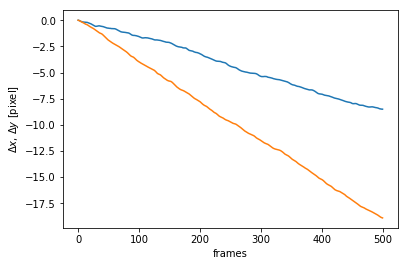

In [63]:
plt.plot(drift)
plt.xlabel('frames')
plt.ylabel('$\Delta x$, $\Delta y$ [pixel]')

### Drift substraction

In [18]:
motion_streaming.subtract_drift_stream(path, savepath, drift)

This will create a new file as indicated in 'savepath'. This file contains trajectories after the drift subtraction

### Compute ensemble MSD

First, we need to define the value of the parameters;

In [2]:
mpp = 0.273 # micron per pixel
fps = 20 # frames per second
nlagtime = 50 # number of estimated required lagtime
max_lagtime = 200 # maximum intercals of frames

Then, calculate the ensemble MSD. Here you can put the values 'framejump' which allows you to skip the t0 frame (to improve the speed).

In [5]:
em = motion_streaming.emsd_stream(savepath, mpp, fps, nlagtime, max_lagtime, framejump = 10)

The result is a Dataframe as follows; 

In [6]:
em.head()

,<x^2>,<y^2>,msd,std,lagt
1,0.0156647,0.0156928,0.0313575,0.00151602,0.05
2,0.0380671,0.0377918,0.0758589,0.0036908,0.10
3,0.0592588,0.0586769,0.117936,0.00634405,0.15
4,0.0805958,0.0795617,0.160158,0.00844141,0.20
5,0.10182,0.0997995,0.20162,0.0101685,0.25


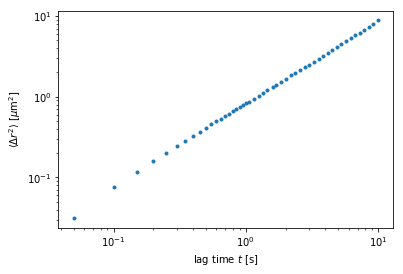

In [7]:
plt.plot(em.lagt,em.msd,'.')
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$ [s]')
plt.xscale('log')
plt.yscale('log')

You can also plot $<x^2>$ and $<y^2>$ together to verify the drift subtraction.

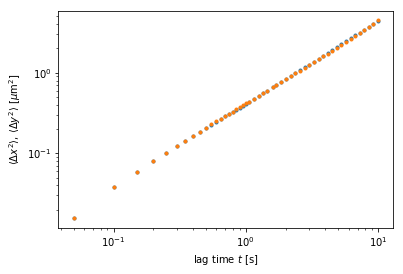

In [8]:
x = plt.plot(em.lagt,em['<x^2>'],'.')
y = plt.plot(em.lagt,em['<y^2>'],'.')
plt.ylabel(r'$\langle \Delta x^2 \rangle$, $\langle \Delta y^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$ [s]')
plt.xscale('log')
plt.yscale('log')